# Project Title

## Analyse de Risques en Aviation pour l’Optimisation des Investissements Aéronautique

#### Analyste : Lionel PETIOTE

## Overview

Ce projet est réalisé dans un contexte d’expansion stratégique et vise à analyser un ensemble de données aéronautiques afin d’identifier les modèles d’avions les plus sûrs et les moins risqués pour un investissement initial. En examinant des indicateurs tels que le nombre d’incidents, la gravité des accidents, la fréquence d’utilisation et d’autres variables pertinentes, nous établirons un classement des avions les plus fiables.

Les résultats de cette analyse seront traduits en recommandations claires et exploitables pour la direction de la nouvelle division aéronautique, facilitant ainsi la prise de décision dans le choix des appareils à acquérir et à exploiter.

## Business Understanding

Dans le cadre de sa diversification, l’entreprise souhaite investir dans l’aviation commerciale et privée. Cependant, ce secteur comporte des risques importants liés à la sécurité et à la fiabilité des avions.

L’objectif principal est d’identifier les modèles d’avions les moins risqués afin de guider les décisions d’achat. Il s’agit de transformer les données disponibles en informations claires et exploitables pour aider la nouvelle division aéronautique à faire des choix sûrs et stratégiques, tout en minimisant les risques financiers et opérationnels.

# Importation et prise de contact

In [1]:
# Importation des bibliotèques de base
import pandas as pd
import numpy as np
from numbers import Number
import warnings
warnings.filterwarnings('ignore')

# Importation des bibliothèques de visuel.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importation des données el lecture des 5 premières lignes
df = pd.read_csv('AviationData.csv', encoding="mac_roman")
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
# Renseignement sur la dimension de la base de données
df.shape

(88889, 31)

##### Il s'agit d'un table de données avec 31 colonnes et 88 889 lignes.

## Data Understanding

In [3]:
# Exploration des données (Nom des colonnes, Nombre de valeurs non-nulles, type de données)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

##### La table de données contient 31 colonnes, 26 d'entre elles sont de type "objet" et seulement 5 sont de type "numérique". La quantité de valeurs manquantes varie d'une colonne à l'autre et très  peu de colonnes sont complètes. 

La colonne Event_Id peut être considérée comme la clé primaire de la table et ne devrait pas contenir de doublons. Vérification de l'unicité des valeurs de la colonne Event.Id.

In [4]:
# Valeurs uniques dans Event.Id
df['Event.Id'].nunique()

87951

Sur 88 889 enregistrements, on trouve 87 951 valeurs uniques, c'est qui implique environ 938 doublons. C'est doublons sont en grande partie des évènements enregistrés plus d'une fois. Il est nécessaire de les supprimer.¶

#### Exploration de la distribution temporelle des doonnées

In [5]:
# Distribution temporelle des accidents
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
assert df['Event.Date'].dtype == 'datetime64[ns]'

#Groupement par années
accidents_par_annee = df.groupby(df['Event.Date'].dt.year).size()
accidents_par_annee

Event.Date
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

###### Les données s'étendent de 1948 à 2022 avec une quantité négligeable avant 1982 (Valeurs extrèmes qu'il convient d'exclure si l'on souhaite analyser l'évolution temporelle).

In [6]:
# Résumé statistique des variables numériques
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


##### Cette analyse statisque se porte sur les cinq colonnes ayant des données de type numérique. Pour chaque colonne, elle renseigne sur le nombre de valeurs non-nulles, la moyenne, l'écart-type, les valeurs minimale et maximale ainsi que les quartiles.

##### En moyenne, les aéronerfs ont 1 moteur, le nombre de moteurs max est de 8 et le min, de 0. Donc la base de données contient des appareils sans moteurs. Comme l'entreprise vise investir dans l'aviation commerciale et que les aéronerfs sans moteur sont souvent attribuer au sport et au loisir, on peut se permettre d'exclure l'ensemble des a♪ronerfs sans moteur.

In [7]:
# Décompte du nombre d'aéronerfs pour chaque nombre de moteurs
engine_counts = df['Number.of.Engines'].value_counts().sort_index()

for engines, count in engine_counts.items():
    print(f"{int(count)} aéronerfs ont {int(engines)} moteur(s)")

1226 aéronerfs ont 0 moteur(s)
69582 aéronerfs ont 1 moteur(s)
11079 aéronerfs ont 2 moteur(s)
483 aéronerfs ont 3 moteur(s)
431 aéronerfs ont 4 moteur(s)
1 aéronerfs ont 6 moteur(s)
3 aéronerfs ont 8 moteur(s)


In [8]:
# Vérification de la marque et du modèle des aéronerfs sans moteur
df[df['Number.of.Engines'] == 0][['Make', 'Model', 'Aircraft.Category']]

,Make,Model,Aircraft.Category
62,Schleicher,ASW 20,Glider
247,Raven,S-55A,Balloon
353,Balloon Works,FIREFLY,Balloon
433,Barnes,FIREFLY-7,Balloon
436,Barnes,BALLOON AX7,Balloon
...,...,...,...
88322,SCHLEICHER,ASW-20B,Glider
88462,SCHWEIZER,SGS 2-33A,Glider
88476,Firefly Balloons,Firefly 8B-15,Balloon
88596,SCHLEICHER,ASW-20,Glider


##### On voit qu'il s'agit surtout de planeurs et de ballons volant, ces catégories ne sont pas trop pertinentes pour le choix d'aéronerfs dans un cadre commercial.

In [9]:
# Calcul du pourcentage de valeurs manquantes par colonne
valeurs_manquantes = df.isnull().mean() * 100
valeurs_manquantes = valeurs_manquantes.sort_values(ascending=False)
valeurs_manquantes

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Event.Date                 0

##### Seulement 4 colonnes sont complètement remplies, les autres présentent des pourcentages de données manquantes allant de moins 1 % jusqu'à plus de 85 %.

Essayons de mieux comprendre les valeurs de la colonne 'Injury.Severity'

In [10]:
df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

##### Cette colonne renseigne sur la gravité des accidents. Elle contient une catégorisation qualitative de l’accident en fonction des blessures subies par les occupants. Pour les accidents fatals, elle indique entre parenthèses le nombre de personnes décédées. 
##### Elle renseigne sur la gravité des blessures au cas ou il n'y a pas de décès (Serious, Minor) et les colonnes Total.Serious.Injuries et Total.Minor.Injuries indique le nombre de chaque catégorie de blessure.

##### Pour comparer le taux de fatalité des crash, il convient d'extrayer le nombre de morts qui sont enregistrés. On obtiendra des informations similaires à celles stockées dans la colonne 'Total.Fatal.Injuries'

## Data Preparation

In [11]:
# Normalisation des chaînes de caractères

Text_Type = df.select_dtypes(include=['object']).columns

for column in Text_Type:
    df[column] = df[column].str.strip().str.lower()

##### Les enregistrements sont faits avec date complète mais il n'est pas évident qu'on va pouvoir tirer trop d'information à partir de la date de jour. Extrayons les années de sorte qu'on puisse mieux aprécier l'étendue et la répartition temporelles des données.

In [12]:
# Ajout d'une nouvelle colonne
df["Date.Year"] = df.loc[:,("Event.Date")].dt.year

In [13]:
# Création d'une colonne pour fusionner les colonne 'Make' et 'Model'
df['Aircraft']= df['Make'] + ' ' + df['Model']

##### Dans une colonne appelée 'Death', extrayons les nombre de personnes mortes par accident fatal dans la colonne 'Injury.Severity'. Cette colonne risque de manquer bcp de valeurs pourvu que tous les accidents n'ont pas eu de décès. Il faut donc la compléter avec les données de la colonne 'Total.Fatal.Injuries' ou mettre 0 comme quantité de décès quand l'accident n'est pas fatal.
##### Certains enregistrements indiquent "Fatal" dans la colonne 'Injury.Severity' sans préciser le nombre de décès, dans ce cas, on se réfère à loa colonne 'Total.Fatal.Ijuries' pour voir s'il ne renseigne pas sur le nombre de décés.

In [14]:
# Extraction du nombre de morts à chaque fois qu'un accident est fatal.
df['Death'] = df['Injury.Severity'].str.extract(r'\((\d+)\)')

# Conversion de la colonne 'Death' en numérique
df['Death'] = pd.to_numeric(df['Death'], errors='coerce')

# Remplacement des autres valeurs
def compute_death(row):
    if pd.notnull(row['Death']):
        return row['Death']
    elif str(row['Injury.Severity']).lower() in ['fatal']:
        return row['Total.Fatal.Injuries']
    else:
        return 0
    
df['Death'] = df.apply(compute_death, axis=1)

##### Si la colonne 'Injury.Severity' n'indique pas "Serious", on peut se permettre de remplacer par 0 la valeur manquante dans la colonne 'Total.Serious.Injuries'.

In [15]:
# Remplissage des valeurs manquantes de la colonne 'Total.Serious.Injuries'
df.loc[(df['Injury.Severity'] != 'Serious') & (df['Total.Serious.Injuries'].isna()), 'Total.Serious.Injuries'] = 0

##### Si la colonne 'Injury.Severity' n'indique pas "Minor", on peut se permettre de remplacer par 0 la valeur manquante dans la colonne 'Total.Minor.Injuries'

In [16]:
# Remplissage des valeurs manquantes de la colonne 'Total.Minor.Injuries'
df.loc[(df['Injury.Severity'] != 'Minor') & (df['Total.Minor.Injuries'].isna()), 'Total.Minor.Injuries'] = 0

##### Si la colonne 'Injury.Severity' indique "Fatal", on peut se permettre de remplacer par 0 la valeur manquante dans la colonne 'Total.Uninjured'.

In [17]:
# Remplissage des valeurs manquantes de la colonne Total.Uninjured
df.loc[df['Injury.Severity'].str.contains('Fatal', na=False) & (df['Total.Uninjured'].isna()), 'Total.Uninjured'] = 0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34373 non-null  object        
 7   Longitude               34364 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

## Data cleaning

##### Pour accompagner au mieux l’entreprise dans sa diversification vers le secteur aéronautique, nous avons commencé par faire un premier tri dans les données fournies par le National Transportation Safety Board. En ce sens, les colonnes qui se sont révélées peu pertinentes pour l’objectif de l’analyse ou fortement incomplètes seront supprimées. D’autres colonnes, bien qu’utiles, seront aussi écartées après que leurs informations essentielles aient été extraites ou stockées dans de nouvelles colonnes plus claires et mieux formatées. Cette étape vise à alléger le jeu de données, à éliminer les redondances et à faciliter les analyses ultérieures en se concentrant uniquement sur les variables les plus informatives et exploitables.

In [19]:
# Suppression des doublons de la colonne Event.Id
df = df.drop_duplicates(subset="Event.Id", keep="first")

In [20]:
# Calcul du pourcentage de valeurs manquantes par colonne
valeurs_manquantes = df.isnull().mean() * 100
valeurs_manquantes = valeurs_manquantes.sort_values(ascending=True)
valeurs_manquantes

Event.Id                   0.000000
Date.Year                  0.000000
Total.Minor.Injuries       0.000000
Total.Serious.Injuries     0.000000
Death                      0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.059124
Make                       0.071631
Model                      0.104604
Amateur.Built              0.113700
Aircraft                   0.127344
Country                    0.252413
Injury.Severity            1.125627
Registration.Number        1.461041
Aircraft.damage            3.528101
Weather.Condition          5.085786
Total.Uninjured            6.666212
Number.of.Engines          6.852679
Purpose.of.flight          6.960694
Report.Status              7.232436
Engine.Type                7.986265
Total.Fatal.Injuries      12.810542
Publication.Date          15.462019
Broad.phase.of.flight     30.828530
Airport.Name              40.743141
Airport.Code              43

In [21]:
# Liste des colonnes à supprimer. Cette liste comprend les colonnes peu pertinentes et celles avec plus de 30 % de valeurs manquantes.
colonnes_peu_pertinentes = [
    'Event.Date',
    'Accident.Number',
    'Airport.Code',
    'Airport.Name',
    'Registration.Number',
    'FAR.Description',
    'Schedule',
    'Air.carrier',
    'Publication.Date',
    'Report.Status',
    'Latitude',
    'Longitude',
    'Aircraft.Category',
    'Total.Fatal.Injuries',
    'Injury.Severity',
    'Country',
    'Location'
]

# Suppression des colonnes peu pertinentes
df.clean = df.drop(columns=colonnes_peu_pertinentes)
df.clean.shape

(87951, 17)

In [22]:
# Exclusion des aéronerfs sans moteur
df_clean_filtered = df.clean[df.clean['Number.of.Engines']>0]
df_clean_filtered.shape

(80714, 17)

##### Les années 1948, 1962, 1974, 1977,1979 et 1981 ont très peu de données, l'enregistrement massif des accident a commencé à partir de 1982. Pour ne pas biaiser les analyses, supprimons ces valeurs extrèmes.

In [23]:
df_clean_filtered = df_clean_filtered.drop(df_clean_filtered[df_clean_filtered['Date.Year'] < 1982].index)

##### Les aéronerfs sont identifiés à partir de leur marque et modèle, impérativement, les données sur la marque et le modèle doivent-être disponibles pour mener à bien l'analyse. Supprimons les lignes ne disposant pas de ces informations.

In [24]:
# Suppression des enregistrements manquant la marque et le modèle de l'aéronerf
df_clean_filtered.dropna(subset=['Make', 'Model'], inplace=True)

In [25]:
# Recalcul du pourcentage de valeurs manquantes par colonne
valeurs_manquantes = df_clean_filtered.isnull().mean() * 100
valeurs_manquantes = valeurs_manquantes.sort_values(ascending=True)
valeurs_manquantes

Event.Id                   0.000000
Date.Year                  0.000000
Total.Minor.Injuries       0.000000
Total.Serious.Injuries     0.000000
Aircraft                   0.000000
Number.of.Engines          0.000000
Death                      0.000000
Model                      0.000000
Make                       0.000000
Investigation.Type         0.000000
Amateur.Built              0.024796
Weather.Condition          1.930397
Aircraft.damage            2.255229
Engine.Type                3.071029
Purpose.of.flight          3.959979
Total.Uninjured            6.062710
Broad.phase.of.flight     26.642449
dtype: float64

In [26]:
# Calcul du nombre de valeurs manquantes par colonne
df_clean_filtered.isna().sum()

Event.Id                      0
Investigation.Type            0
Aircraft.damage            1819
Make                          0
Model                         0
Amateur.Built                20
Number.of.Engines             0
Engine.Type                2477
Purpose.of.flight          3194
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured            4890
Weather.Condition          1557
Broad.phase.of.flight     21489
Date.Year                     0
Aircraft                      0
Death                         0
dtype: int64

In [27]:
# Affichage des valeurs de la colonne Total.Uninjured
df_clean_filtered['Total.Uninjured'].value_counts(dropna=False)

0.0      26520
1.0      23905
2.0      15008
NaN       4890
3.0       3920
         ...  
401.0        1
164.0        1
380.0        1
501.0        1
241.0        1
Name: Total.Uninjured, Length: 362, dtype: int64

##### L'analyse se portera particulièrement sur les données numérique de la base de données pourvu qu'elle comprend des failles. Donc, il serait important que toutes les colonnes concernées directement par l'analyse soient complètes avec des données significatifs.
##### De ce fait, les lignes correspondant aux 4 890 valeurs manquantes de la colonne 'Total.Uninjured' seront supprimées.

In [28]:
# Suppression des valeurs manquantes de la colonne 'Total.Uninjured'
df_clean_filtered = df_clean_filtered.dropna(subset=["Total.Uninjured"])

In [29]:
# Affichage des valeurs stockées dans 'Amateur.Built'
df_clean_filtered['Aircraft'].value_counts()

cessna 152                               2227
cessna 172                               1621
cessna 172n                              1069
piper pa-28-140                           844
cessna 150                                774
                                         ... 
air command international, inc c-147a       1
md helicopter md 900                        1
dehavilland dhc-6-300                       1
beard lancair 320                           1
stribling james l rv4                       1
Name: Aircraft, Length: 14968, dtype: int64

##### La colonne 'Aircraft'  est issue de la fusion des colonnes 'Make' et 'Model', elle renvoie plus de 16 000 combimaisons différentes, parmi lesquelles, plus de 10 000 ont une seule occurence.

In [30]:
# Faisons ressortir l'étendue temporelle des enregistrements
df_clean_filtered['Date.Year'].unique()

array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [31]:
# Calcul du nombre de valeurs manquantes par colonne
df_clean_filtered.isna().sum()

Event.Id                      0
Investigation.Type            0
Aircraft.damage            1800
Make                          0
Model                         0
Amateur.Built                12
Number.of.Engines             0
Engine.Type                2466
Purpose.of.flight          2981
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          1510
Broad.phase.of.flight     21419
Date.Year                     0
Aircraft                      0
Death                         0
dtype: int64

##### Ces colonnes que contiennent des valeurs manquantes ne causeront pas trop de biais aux analyses qui seront portées sur les données de type numérique.

In [32]:
df_clean_filtered.to_csv('AviationDataClean.csv', index=False,  encoding='utf-8')

## Analysis and Results

#### A travers ce jeu de données, on pourrait effectuer tout type d'analyse suivant les objectifs de l'étude. Pour notre cas, les analyses seront orientées vers un classement des aéronerfs les moins risqués.

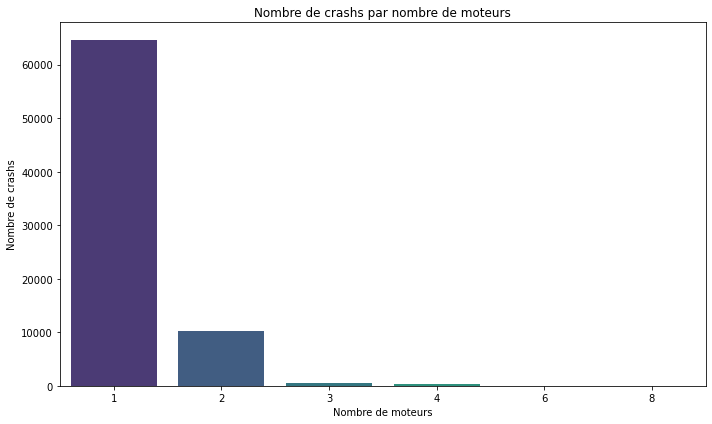

In [33]:
# Groupement des crashs par nombre de moteurs
crash_counts = df_clean_filtered['Number.of.Engines'].value_counts().sort_index()

# Création d'un graphique en barres
plt.figure(figsize=(10,6))
sns.barplot(x=crash_counts.index.astype(int), y=crash_counts.values, palette='viridis')

# Ajouter les titres et étiquettes
plt.title("Nombre de crashs par nombre de moteurs")
plt.xlabel("Nombre de moteurs")
plt.ylabel("Nombre de crashs")
plt.xticks(rotation=0)
plt.tight_layout()

# Afficher
plt.show()

##### La plupart des crashs sont enregistrés sur des modèles monomoteurs. Il serait préférable que l'entreprise opte pour des appareils à plus d'un moteur. 
##### On peut écarter les appareils monomoteurs.

In [34]:
df_multimoteur = df_clean_filtered[df_clean_filtered['Number.of.Engines'] > 1]

### Première catégorie d'analyses
##### Ces analyses se porte sur le nombre de personnes victime/indemne par accident

In [35]:
# Calcul du nombre total de personnes victimes
df_multimoteur['Total.victim'] = df_multimoteur[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Death']].sum(axis=1)

In [36]:
# Filtrage et stokcage de aéronerfs avec leur qté de personnes indemnes, nombre de victimes et nombre d'occurrences
Resume = df_multimoteur.groupby(['Aircraft']).agg(
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_victim=('Total.victim', 'sum'),
    Occurrences=('Event.Id', 'size')
).reset_index()

In [37]:
# Filtrage des aéronerfs les mieux représentés dans la base
Resume = Resume[Resume['Occurrences'] >= 50]

# Tri des aéronerfs suivant le total de personnes indemnes le plus élevé et le plus d'occurrences
Resume = Resume.sort_values(by=['Total_Uninjured','Occurrences'], ascending=[False,False])

In [38]:
# Affichage des 20 aéronerfs presentant le plus de personnes indemnes sur le plus grand nombre d'accidents
top20_1 = Resume.head(20)

resultats = []
for _, row in top20_1.iterrows():
    nom = row['Aircraft']
    ratio = round(row['Total_victim'], 4)
    occ = int(row['Occurrences'])
    resultats.append(f"{nom} ({occ} occurrences, ratio = {ratio})")

print("\nEn considérant le nombre de personnes indemnes par rapport au nombre d'accidents, les 20 aéronefs les plus sûrs sont :")
display(top20_1[['Aircraft', 'Total_Uninjured', 'Total_victim', 'Occurrences']])


En considérant le nombre de personnes indemnes par rapport au nombre d'accidents, les 20 aéronefs les plus sûrs sont :


,Aircraft,Total_Uninjured,Total_victim,Occurrences
658,boeing 737,9504.0,536.0,122
2375,piper pa-31-350,549.0,269.0,238
2348,piper pa-23-250,313.0,278.0,259
2403,piper pa-34-200t,313.0,164.0,183
2359,piper pa-30,298.0,144.0,189
1214,cessna 402c,290.0,90.0,91
316,beech 58,279.0,207.0,208
1226,cessna 421c,223.0,203.0,120
298,beech 200,219.0,43.0,61
1212,cessna 402b,194.0,103.0,103


In [39]:
# Calcul du nombre moyen de personnes victimes par accident
Resume['Mean_victim'] = Resume['Total_victim'] / Resume['Occurrences']

In [40]:
# Filtrage des aéronerfs les mieux représentés dans la base
Resume = Resume[Resume['Occurrences'] >= 50]

# Tri des aéronerfs suivant le nombre moyen de victimes le plus faible par rapportau nombre d'occurrences
Resume = Resume.sort_values(by=['Mean_victim','Occurrences'], ascending=[True,False])

In [41]:
# Affichage des 20 aéronerfs presentant en moyenne le moins de victimes par rapport au nombre d'occurrences
top20_2 = Resume.head(20)

resultats = []
for _, row in top20_2.iterrows():
    nom = row['Aircraft']
    ratio = round(row['Total_victim'], 4)
    occ = int(row['Occurrences'])
    resultats.append(f"{nom} ({occ} occurrences, ratio = {ratio})")

print("\nEn considérant le nombre moyen de victimes par rapport au nombre d'accidents, les 20 aéronefs les plus sûrs sont :")
display(top20_2[['Aircraft', 'Total_Uninjured', 'Total_victim', 'Occurrences', 'Mean_victim']])


En considérant le nombre moyen de victimes par rapport au nombre d'accidents, les 20 aéronefs les plus sûrs sont :


,Aircraft,Total_Uninjured,Total_victim,Occurrences,Mean_victim
2416,piper pa-44-180,159.0,42.0,91,0.461538
2401,piper pa-34-200,183.0,60.0,94,0.638298
298,beech 200,219.0,43.0,61,0.704918
2359,piper pa-30,298.0,144.0,189,0.761905
337,beech 76,87.0,48.0,62,0.774194
515,beech e18s,98.0,48.0,59,0.813559
1146,cessna 310,114.0,67.0,81,0.827160
2404,piper pa-34-220t,89.0,49.0,59,0.830508
1168,cessna 310q,106.0,65.0,78,0.833333
2403,piper pa-34-200t,313.0,164.0,183,0.896175


In [42]:
# Calcul du nombre moyen de personnes indemnes par accident
Resume['Mean_Uninjured'] = Resume['Total_Uninjured'] / Resume['Occurrences']

In [43]:
# Filtrage des aéronerfs les mieux représentés dans la base
Resume = Resume[Resume['Occurrences'] >= 50]

# Tri des aéronerfs suivant le nombre moyen de personnes indemnes par rapportau nombre d'occurrences
Resume = Resume.sort_values(by=['Mean_Uninjured','Occurrences'], ascending=[False,False])

In [44]:
# Affichage des 20 aéronerfs presentant en moyenne le plus de personnes indemnes par rapport au nombre d'occurrences
top20_3 = Resume.head(20)

resultats = []
for _, row in top20_3.iterrows():
    nom = row['Aircraft']
    ratio = round(row['Total_victim'], 4)
    occ = int(row['Occurrences'])
    resultats.append(f"{nom} ({occ} occurrences, ratio = {ratio})")

print("\nEn considérant le nombre moyen de personnes indemnes par rapport au nombre d'accidents, les 20 aéronefs les plus sûrs sont :")
display(top20_3[['Aircraft', 'Total_Uninjured', 'Total_victim', 'Occurrences', 'Mean_Uninjured']])


En considérant le nombre moyen de personnes indemnes par rapport au nombre d'accidents, les 20 aéronefs les plus sûrs sont :


,Aircraft,Total_Uninjured,Total_victim,Occurrences,Mean_Uninjured
658,boeing 737,9504.0,536.0,122,77.901639
298,beech 200,219.0,43.0,61,3.590164
1214,cessna 402c,290.0,90.0,91,3.186813
2375,piper pa-31-350,549.0,269.0,238,2.306723
1225,cessna 421b,184.0,121.0,91,2.021978
2401,piper pa-34-200,183.0,60.0,94,1.946809
1212,cessna 402b,194.0,103.0,103,1.883495
1226,cessna 421c,223.0,203.0,120,1.858333
2416,piper pa-44-180,159.0,42.0,91,1.747253
2403,piper pa-34-200t,313.0,164.0,183,1.710383


##### On dispose de trois classements, chacun prend en compte des paramêtres spécifiques. Croisons les trois classements pour voir s'il existe une corrélation entre eux.

In [45]:
#Ajout d'un rang à chaque classement
top20_1['Rang_Indemnes'] = top20_1.index + 1
top20_2['Rang_Blesses'] = top20_2.index + 1
top20_3['Rang_MoyenneIndemnes'] = top20_3.index + 1

In [46]:
# Nettoyage de la colonne Aircraft dans tous les DataFrames
for df in [top20_1, top20_2, top20_3]:
    df['Aircraft'] = df['Aircraft'].str.strip().str.upper()
    
# Fusion sur la colonne Aircraft
TOP_12 = pd.merge(top20_1[['Aircraft', 'Rang_Indemnes']], 
                    top20_2[['Aircraft', 'Rang_Blesses']], 
                    on='Aircraft', how='outer')

TOP_123 = pd.merge(TOP_12, 
                    top20_3[['Aircraft', 'Rang_MoyenneIndemnes']], 
                    on='Aircraft', how='outer')

TOP_123['Nb_Criteres'] = TOP_123[
    ['Rang_Indemnes', 'Rang_Blesses', 'Rang_MoyenneIndemnes']
].notna().sum(axis=1)

In [47]:
# Calcul de la moyenne des rangs
TOP_123['Score_Global'] = TOP_123[
    ['Rang_Indemnes', 'Rang_Blesses', 'Rang_MoyenneIndemnes']
].mean(axis=1)

In [48]:
classement_final = TOP_123.sort_values('Score_Global').head(20)

print("\nEn combinant les trois classements top20_1, top20_2 et top20_3, on obtient un classement final indiquant les 20 aéronerfs les moins risqués qui sont :")
display(classement_final[['Aircraft', 'Score_Global']])


En combinant les trois classements top20_1, top20_2 et top20_3, on obtient un classement final indiquant les 20 aéronerfs les moins risqués qui sont :


,Aircraft,Score_Global
8,BEECH 200,299.0
6,BEECH 58,317.0
25,BEECH 58P,321.0
20,BEECH 76,338.0
17,BEECH 95-B55,352.0
19,BEECH E18S,516.0
0,BOEING 737,659.0
14,CESSNA 310,1147.0
16,CESSNA 310Q,1169.0
13,CESSNA 310R,1170.0


## Tri des aéronerfs suivant leur état après crash

In [72]:
# Regrouper les aéronerfs suivant leur dommage après accident
Damage_crash = df_multimoteur.groupby(['Aircraft', 'Aircraft.damage']).size().reset_index(name='Nombre_de_Cas')

# Trier par nombre de cas décroissant
Damage_crash = Damage_crash.sort_values(by=['Nombre_de_Cas', 'Aircraft.damage'], ascending=[False,False])

# Afficher le résultat
Suggestion = Damage_crash.head(20)
Suggestion

,Aircraft,Aircraft.damage,Nombre_de_Cas
2713,piper pa-23-250,substantial,160
2754,piper pa-31-350,substantial,154
340,beech 58,substantial,140
2728,piper pa-30,substantial,137
2800,piper pa-34-200t,substantial,117
2711,piper pa-23-250,destroyed,91
1411,cessna 421c,substantial,73
2822,piper pa-44-180,substantial,71
2796,piper pa-34-200,substantial,70
1379,cessna 402b,substantial,67


## Ces Aéronerfs sont les 20 mieux classés que l'entreprise peut envisager pour investir son capital

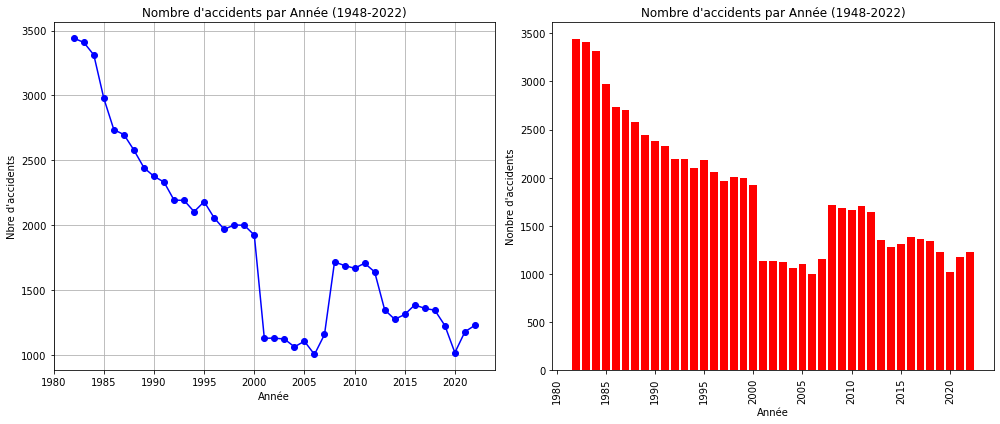

In [51]:
Nbre_accidents_par_an = df_clean_filtered['Date.Year'].value_counts().sort_index()

#Taille de la figure
plt.figure(figsize=(14, 6))

#Graphe d'évolution du nombre d'accidents par année
plt.subplot(1, 2, 1)
plt.plot(Nbre_accidents_par_an.index, Nbre_accidents_par_an.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Année")
plt.ylabel("Nbre d'accidents")
plt.title("Nombre d'accidents par Année (1948-2022)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(Nbre_accidents_par_an.index, Nbre_accidents_par_an.values, color='red')
plt.xlabel("Année")
plt.ylabel("Nonbre d'accidents")
plt.title("Nombre d'accidents par Année (1948-2022)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### Ces graphes présentent l'évolution des crash d'avion enregistrés de 1948 à 2022. On voit que le nombre d'accidents enregistrés de 1982 à 2022 est à la baisse, peut-être grace aux améliorations technologiques faites dans le domaine de l'aéronotique.

In [52]:
df_clean_filtered.columns

Index(['Event.Id', 'Investigation.Type', 'Aircraft.damage', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
       'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight',
       'Date.Year', 'Aircraft', 'Death'],
      dtype='object')

In [53]:
# Conversion des colonnes en nombres
df_clean_filtered['Total.Serious.Injuries'] = pd.to_numeric(df_clean_filtered['Total.Serious.Injuries'], errors='coerce')
df_clean_filtered['Total.Minor.Injuries'] = pd.to_numeric(df_clean_filtered['Total.Minor.Injuries'], errors='coerce')
df_clean_filtered['Total.Uninjured'] = pd.to_numeric(df_clean_filtered['Total.Uninjured'], errors='coerce')

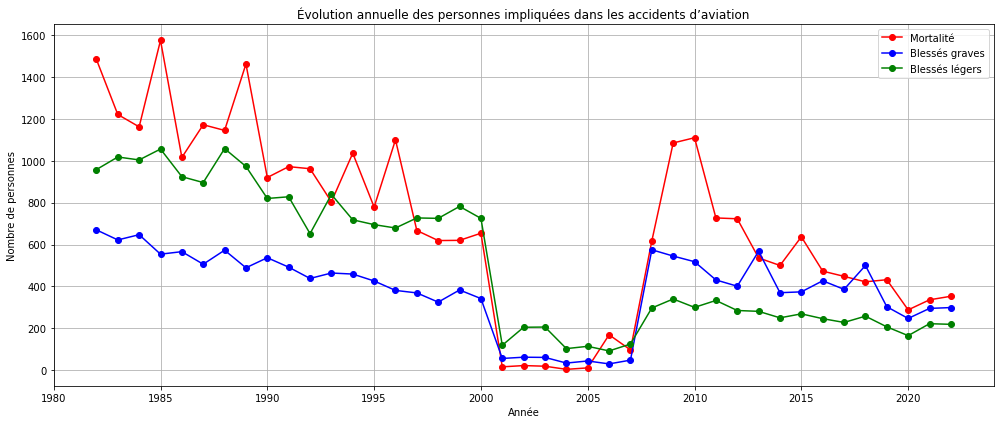

In [54]:
# Groupons les personnes blessées dans les accidents par année selon le type de blessure
décès_par_an = df_clean_filtered.groupby('Date.Year')['Death'].sum()
blessés_graves_par_an = df_clean_filtered.groupby('Date.Year')['Total.Serious.Injuries'].sum()
blessés_légers_par_an = df_clean_filtered.groupby('Date.Year')['Total.Minor.Injuries'].sum()

# Graphique sur la gravité annuelle des accidents suivant les personnes impliquées
plt.figure(figsize=(14, 6))

plt.plot(décès_par_an.index, décès_par_an.values, label='Mortalité', color='red', marker='o')
plt.plot(blessés_graves_par_an.index, blessés_graves_par_an.values, label='Blessés graves', color='blue', marker='o')
plt.plot(blessés_légers_par_an.index, blessés_légers_par_an.values, label='Blessés légers', color='green', marker='o')

plt.title("Évolution annuelle des personnes impliquées dans les accidents d’aviation")
plt.xlabel("Année")
plt.ylabel("Nombre de personnes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

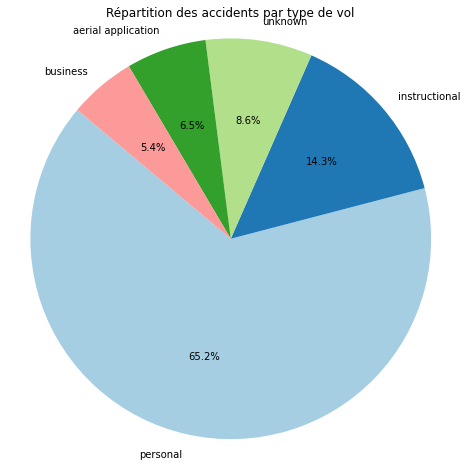

In [55]:
# Compter les occurrences par objectif de vol
purpose_counts = df_clean_filtered['Purpose.of.flight'].value_counts().head(5)


plt.figure(figsize=(8, 8))

plt.pie(
    purpose_counts,
    labels=purpose_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title("Répartition des accidents par type de vol")
plt.axis('equal')
plt.savefig("graphique.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

##### La plupart des crashs sont enregistrés sur des modèles monomoteurs. Il serait préférable que l'entreprise opte pour des appareils à plus d'un moteur

In [56]:
Death_per_Aircraft = df_clean_filtered.groupby('Aircraft')['Death'].agg(
    ['sum', 'mean', 'count']
).reset_index()
Death_per_Aircraft.columns = [
    'Aircraft', 
    'Total_Fatalities', 
    'Avg_Fatalities_per_Accident', 
    'Accident_Count'
]
Death_per_Aircraft

,Aircraft,Total_Fatalities,Avg_Fatalities_per_Accident,Accident_Count
0,177mf llc pitts model 12,0.0,0.0,1
1,1st ftr gp focke-wulf 190,1.0,1.0,1
2,2007 savage air llc epic lt,0.0,0.0,1
3,2021fx3 llc ccx-2000,0.0,0.0,2
4,3xtrim 450 ultra,1.0,1.0,1
...,...,...,...,...
14963,zubair s khan raven,1.0,1.0,1
14964,zuber thomas p zuber super drifter,0.0,0.0,1
14965,zukowski eaa biplane,0.0,0.0,1
14966,zwart kit fox vixen,0.0,0.0,1


In [57]:
# Calcul du nombre total de personnes victimes
df_clean_filtered['Total.Injuries'] = df_clean_filtered[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Death']].sum(axis=1)

In [58]:
Resume = df_clean_filtered.groupby(['Aircraft']).agg(
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Injuries=('Total.Injuries', 'sum'),
    Occurrences=('Event.Id', 'size')
).reset_index()
Resume

,Aircraft,Total_Uninjured,Total_Injuries,Occurrences
0,177mf llc pitts model 12,0.0,2.0,1
1,1st ftr gp focke-wulf 190,0.0,1.0,1
2,2007 savage air llc epic lt,4.0,0.0,1
3,2021fx3 llc ccx-2000,4.0,0.0,2
4,3xtrim 450 ultra,0.0,2.0,1
...,...,...,...,...
14963,zubair s khan raven,0.0,1.0,1
14964,zuber thomas p zuber super drifter,1.0,0.0,1
14965,zukowski eaa biplane,1.0,0.0,1
14966,zwart kit fox vixen,2.0,0.0,1


In [59]:
Resume = Resume.sort_values(by=['Total_Uninjured','Occurrences'], ascending=[False,True])
Resume.head(20)

,Aircraft,Total_Uninjured,Total_Injuries,Occurrences
2595,boeing 737,9504.0,536.0,122
9494,mcdonnell douglas dc-10-10,5840.0,458.0,35
2775,boeing 767,4225.0,68.0,37
2733,boeing 747-422,3770.0,52.0,12
2547,boeing 727-200,3630.0,55.0,35
2731,boeing 747-400,3492.0,9.0,13
9498,mcdonnell douglas dc-10-30,3165.0,65.0,14
2762,boeing 757-232,3139.0,48.0,22
2639,boeing 737-300,3135.0,87.0,33
9526,mcdonnell douglas dc-9-82,3009.0,174.0,28


In [60]:
top20_1 = Resume.head(20)

resultats = []
for _, row in top20_1.iterrows():
    nom = row['Aircraft']
    ratio = round(row['Total_Injuries'], 4)
    occ = int(row['Occurrences'])
    resultats.append(f"{nom} ({occ} occurrences, ratio = {ratio})")

print("\nSi on se base sur cette analyse, on dirait que les 20 meilleurs aéronefs les plus sûrs sont :")
display(top20_1[['Aircraft', 'Total_Uninjured', 'Total_Injuries', 'Occurrences']])


Si on se base sur cette analyse, on dirait que les 20 meilleurs aéronefs les plus sûrs sont :


,Aircraft,Total_Uninjured,Total_Injuries,Occurrences
2595,boeing 737,9504.0,536.0,122
9494,mcdonnell douglas dc-10-10,5840.0,458.0,35
2775,boeing 767,4225.0,68.0,37
2733,boeing 747-422,3770.0,52.0,12
2547,boeing 727-200,3630.0,55.0,35
2731,boeing 747-400,3492.0,9.0,13
9498,mcdonnell douglas dc-10-30,3165.0,65.0,14
2762,boeing 757-232,3139.0,48.0,22
2639,boeing 737-300,3135.0,87.0,33
9526,mcdonnell douglas dc-9-82,3009.0,174.0,28


In [61]:
Resume['Mean_Injured'] = Resume['Total_Injuries'] / Resume['Occurrences']

In [62]:
Resume['Mean_Uninjured'] = Resume['Total_Uninjured'] / Resume['Occurrences']

In [63]:
Resume['Injuries.Ratio'] = Resume['Total_Injuries'] / (Resume['Total_Injuries']+Resume['Total_Uninjured'])
Recommandation_1 = Resume.sort_values(by=['Injuries.Ratio', 'Occurrences'], ascending=[True, False]).head(20)
Recommandation_1

,Aircraft,Total_Uninjured,Total_Injuries,Occurrences,Mean_Injured,Mean_Uninjured,Injuries.Ratio
3709,cessna 172sp,21.0,0.0,13,0.0,1.615385,0.0
11047,piper pa-18a 150,16.0,0.0,12,0.0,1.333333,0.0
9575,mcdonnell douglas md-11f,290.0,0.0,10,0.0,29.000000,0.0
7886,howard aircraft corp. dga-15p,23.0,0.0,10,0.0,2.300000,0.0
5389,diamond aircraft ind inc da 20 c1,15.0,0.0,10,0.0,1.500000,0.0
12874,short brothers sd3-60,194.0,0.0,9,0.0,21.555556,0.0
13644,swearingen sa227-ac,48.0,0.0,9,0.0,5.333333,0.0
12257,rockwell international 114,16.0,0.0,9,0.0,1.777778,0.0
7590,helio h-391b,13.0,0.0,9,0.0,1.444444,0.0
4528,cirrus design corp. sr-22,21.0,0.0,8,0.0,2.625000,0.0


In [64]:
top20 = Recommandation_1.head(20)

resultats = []
for _, row in top20.iterrows():
    nom = row['Aircraft']
    ratio = round(row['Injuries.Ratio'], 4)
    occ = int(row['Occurrences'])
    resultats.append(f"{nom} ({occ} occurrences, ratio = {ratio})")

print("\nSi on se base sur cette analyse, on dirait que les 20 meilleurs aéronefs les plus sûrs sont :")
display(top20[['Aircraft', 'Total_Uninjured', 'Total_Injuries', 'Occurrences', 'Injuries.Ratio']])


Si on se base sur cette analyse, on dirait que les 20 meilleurs aéronefs les plus sûrs sont :


,Aircraft,Total_Uninjured,Total_Injuries,Occurrences,Injuries.Ratio
3709,cessna 172sp,21.0,0.0,13,0.0
11047,piper pa-18a 150,16.0,0.0,12,0.0
9575,mcdonnell douglas md-11f,290.0,0.0,10,0.0
7886,howard aircraft corp. dga-15p,23.0,0.0,10,0.0
5389,diamond aircraft ind inc da 20 c1,15.0,0.0,10,0.0
12874,short brothers sd3-60,194.0,0.0,9,0.0
13644,swearingen sa227-ac,48.0,0.0,9,0.0
12257,rockwell international 114,16.0,0.0,9,0.0
7590,helio h-391b,13.0,0.0,9,0.0
4528,cirrus design corp. sr-22,21.0,0.0,8,0.0


#### En combinant les colonnes Marque et Modèle, on obtient 14 968 combinaisons uniques pour un total de 75 657 enregistrements. Cependant, certaines de ces combinaisons apparaissent très peu dans les données. Or, comme on ne dispose pas d’informations sur la fréquence d’utilisation réelle des appareils, un aéronef ayant un seul accident enregistré pourrait en réalité n’avoir volé qu’une seule fois, ce qui ne le rend pas nécessairement sûr. Pour contourner ce biais, j’ai choisi de concentrer l’analyse sur les appareils les plus représentés dans le jeu de données, en comparant la gravité des accidents uniquement parmi ceux ayant un nombre d’occurrences suffisant pour pouvoir faire ressortir des conclusions utiles.

In [65]:
Resume_filtered = Resume[Resume['Occurrences'] >= 200]

# Trier par ratio croissant (plus faible = plus sûr)
top20_safe_aircraft = Resume_filtered.sort_values(by='Injuries.Ratio').head(20)

# Affichage du résultat
top20_safe_aircraft[['Aircraft', 'Total_Uninjured', 'Total_Injuries', 'Occurrences', 'Injuries.Ratio']]

,Aircraft,Total_Uninjured,Total_Injuries,Occurrences,Injuries.Ratio
3795,cessna 185,558.0,112.0,259,0.167164
3708,cessna 172s,415.0,90.0,336,0.178218
3728,cessna 180,968.0,212.0,594,0.179661
3648,cessna 170b,565.0,134.0,374,0.191702
7128,grumman g-164a,270.0,90.0,354,0.250000
4020,cessna a185f,420.0,145.0,267,0.256637
11038,piper pa-18-150,580.0,217.0,538,0.272271
3626,cessna 152,2234.0,847.0,2227,0.274911
3597,cessna 140,409.0,159.0,387,0.279930
11029,piper pa-18,609.0,238.0,550,0.280992


In [66]:
Resume.isna().sum()

Aircraft            0
Total_Uninjured     0
Total_Injuries      0
Occurrences         0
Mean_Injured        0
Mean_Uninjured      0
Injuries.Ratio     87
dtype: int64

In [67]:
# Tri des données suivant le ratio
Resume = Resume.sort_values(by='Injuries.Ratio', ascending=False)
Resume.head(20)

,Aircraft,Total_Uninjured,Total_Injuries,Occurrences,Mean_Injured,Mean_Uninjured,Injuries.Ratio
5789,eipper quicksilver mx,0.0,13.0,13,1.0,0.0,1.0
8117,j&j ultralights sea-wing,0.0,1.0,1,1.0,0.0,1.0
8119,j. roberts pitts special,0.0,1.0,1,1.0,0.0,1.0
8121,j.a.mullan dragonfly,0.0,1.0,1,1.0,0.0,1.0
8123,jabiru 250,0.0,1.0,1,1.0,0.0,1.0
8124,jabiru aircraft pty ltd j170-d,0.0,1.0,1,1.0,0.0,1.0
8130,jabiru usa sport aircraft j250-sp,0.0,1.0,1,1.0,0.0,1.0
8131,jabiru usa sport aircraft llc j170-sp,0.0,1.0,1,1.0,0.0,1.0
8136,"jabiru usa sport aircraft, llc j250-sp",0.0,1.0,1,1.0,0.0,1.0
8137,jacanin great lakes,0.0,1.0,1,1.0,0.0,1.0


# Business Recommendation 1

## Prioriser les aéronefs à double moteur ou plus
### Les avions multimoteurs présentent généralement une meilleure sécurité opérationnelle, en offrant des options en cas de panne moteur. Ils sont plus adaptés à une exploitation commerciale fiable.

# Business Recommendation 2

## Cibler les modèles ayant un historique d'accidents faible et bien documenté
## Privilégier les modèles d’aéronefs ayant :

   #### un grand nombre d’occurrences dans la base,

   #### un faible taux de blessés ou de décès,

   #### et une proportion élevée de passagers indemnes.

# Business Recommendation 3

## Exclure les modèles peu représentés ou associés à des dommages graves fréquents
### Éviter les aéronefs apparaissant rarement dans les données ou ayant un historique marqué par des dommages sévères (Destroyed, Substantial), car ils offrent peu de garanties sur la fiabilité réelle.

## Conclusion

#### L’analyse menée a permis d’identifier 20 modèles d’aéronefs qui se démarquent par un historique relativement favorable en matière de sécurité, selon des critères tels que la proportion de passagers indemnes, la fréquence des dommages mineurs et un taux de victimes globalement faible. Bien que ces résultats soient issus de données historiques, ils offrent des indications utiles pour orienter les choix de l’entreprise. Ces modèles méritent d’être considérés comme des options intéressantes à explorer dans le cadre d’une stratégie d’acquisition réfléchie et progressive.

In [73]:
print("Les 20 modèles d’aéronefs suggérés :\n")
for model in Suggestion['Aircraft']:
    print(f"- {model}")

Les 20 modèles d’aéronefs suggérés :

- piper pa-23-250
- piper pa-31-350
- beech 58
- piper pa-30
- piper pa-34-200t
- piper pa-23-250
- cessna 421c
- piper pa-44-180
- piper pa-34-200
- cessna 402b
- cessna 421b
- cessna 310
- beech 95-b55
- piper pa-31-350
- cessna 310r
- beech 58
- cessna 340a
- piper pa-34-200t
- beech 76
- cessna 310q


### Next Steps

### L’analyse est contrainte par plusieurs limites liées à la qualité des données. De nombreuses entrées présentent des valeurs manquantes, notamment pour les blessures ou les dommages, ce qui complique les comparaisons complètes. Certains modèles apparaissent très rarement, rendant leur évaluation peu fiable. De plus, l’absence d’information sur la fréquence d’utilisation des aéronefs empêche de calculer un véritable taux d’accident par heure de vol. Ces lacunes obligent à interpréter les résultats avec prudence.